# 01-Download-Example-Data.ipynb

## Download the example data from the Cloudnet dataportal and plot the classifications files target classification

In [1]:
import sys, os

root_dir = os.path.abspath('..')
sys.path.append(root_dir)

import glob
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt




### For stand-alone VOODOO processing you need to download the LVL0 binary files from rpg-fmcw-94 Doppler cloud radar and the corresponding classification file from the Cloudnet dataportal.

In [3]:
# Create a directory for the LVL0 binary files and change directory
rpg_files_dir = os.path.join(root_dir, 'sample_data', 'rpg-fmcw-94')
os.makedirs(rpg_files_dir, exist_ok=True)
os.chdir(rpg_files_dir)

In [4]:
# Download the LVL0 binary files
!curl "https://cloudnet.fmi.fi/api/raw-files?dateFrom=2023-02-17&dateTo=2023-02-17&site=eriswil&instrument=rpg-fmcw-94&filenameSuffix=.LV0" | jq '.[]["downloadUrl"]' | xargs -n1 curl -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 35582    0 35582    0     0  91368      0 --:--:-- --:--:-- --:--:-- 91470
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 28.5M  100 28.5M    0     0   9.7M      0  0:00:02  0:00:02 --:--:--  9.7M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
108 22.2M   78 17.5M    0     0  8349k      0  0:00:02  0:00:02 --:--:-- 8349k0 22.2M  100 22.2M    0     0  9013k      0  0:00:02  0:00:02 --:--:-- 9011k
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 21.7M  100 21.7M    0     0  9352k      0  0:00:02 

In [5]:
# Create a directory for the classification files and change directory
classification_files_dir = os.path.join(root_dir, 'sample_data', 'classification')
os.makedirs(classification_files_dir, exist_ok=True)
os.chdir(classification_files_dir)

In [6]:
# Download the classification files
!curl "https://cloudnet.fmi.fi/api/files?dateFrom=2023-02-17&dateTo=2023-02-17&site=eriswil&product=classification" | jq '.[]["downloadUrl"]' | xargs -n1 curl -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  1137    0  1137    0     0   6702      0 --:--:-- --:--:-- --:--:--  6688
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  146k  100  146k    0     0   291k      0 --:--:-- --:--:-- --:--:--  291k


# Load the classification file

In [7]:
# fetch the classification file name
classification_files = glob.glob(os.path.join(classification_files_dir, '*.nc'))
print(classification_files)

# assuming there is only one classification file, open it
xr_class = xr.open_dataset(classification_files[0])
xr_class


['/Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/classification/20230217_eriswil_classification.nc']


<xarray.Dataset> Size: 16MB
Dimensions:                 (time: 2826, height: 477)
Coordinates:
  * time                    (time) datetime64[ns] 23kB 2023-02-17T00:00:15.00...
  * height                  (height) float32 2kB 1.077e+03 ... 1.592e+04
Data variables:
    target_classification   (time, height) float64 11MB ...
    detection_status        (time, height) int32 5MB ...
    cloud_base_height_amsl  (time) float32 11kB ...
    cloud_top_height_amsl   (time) float32 11kB ...
    cloud_base_height_agl   (time) float32 11kB ...
    cloud_top_height_agl    (time) float32 11kB ...
    altitude                float32 4B ...
    latitude                float32 4B ...
    longitude               float32 4B ...
Attributes: (12/15)
    Conventions:                  CF-1.8
    cloudnetpy_version:           1.55.15
    file_uuid:                    58c290bc-0c77-41bc-bea8-e0121a33f07d
    cloudnet_file_type:           classification
    title:                        Classification products from Eriswil
    source_file_uuids:            eb78205f-839c-49f4-8887-2c532a51fa05
    ...                           ...
    year:                         2023
    source:                       METEK MIRA-35\nTROPOS PollyXT\nRPG-Radiomet...
    history:                      2023-10-12 09:11:32 +00:00 - classification...
    references:                   https://doi.org/10.21105/joss.02123
    cloudnet_processing_version:  2.26.3
    pid:                          https://hdl.handle.net/21.12132/1.58c290bc0...

# Plot the classifications target classification

In [24]:
# fetch cloudnet labels and colormap
from cloudnetpy.plotting.plot_meta import _CLABEL
#
#
# Note, when plotting the target classification, always set vmax = 11 to include all classes and make the ticks match the center of colors
#
#
cloudnet_class_labels = [label[0] for label in _CLABEL['target_classification']]
cloudnet_class_colors = [label[1] for label in _CLABEL['target_classification']]
cloudnet_cmap = matplotlib.colors.ListedColormap(cloudnet_class_colors)
cloudnet_class_labels[0] = 'Clear sky'



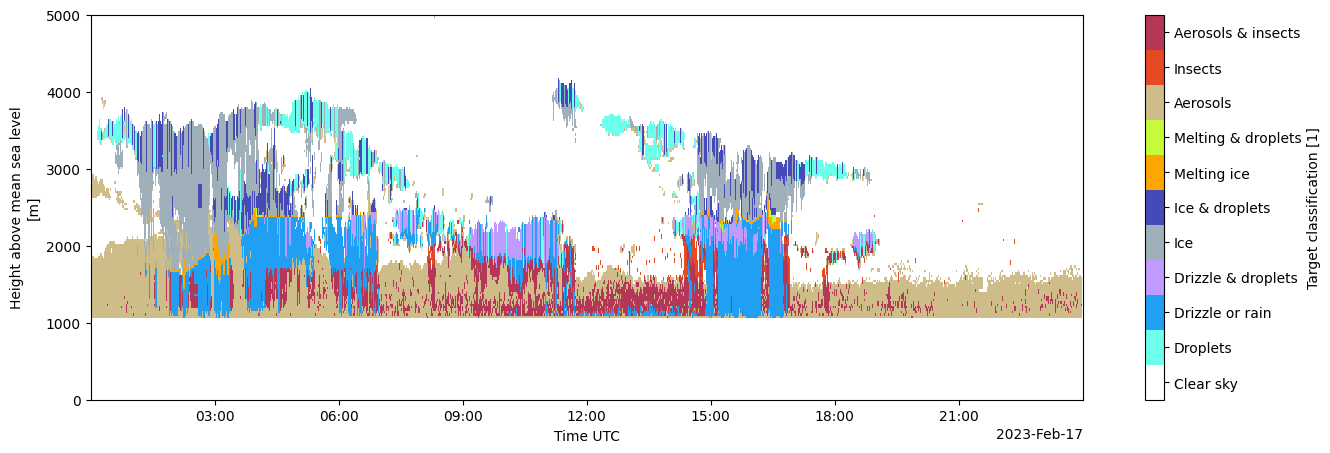

In [25]:
# quicklook at classification
fig, ax = plt.subplots(figsize=(16, 5))
# plot the target classification, important to set vmax to 11 to include all classes and make the ticks match the center of colors
xr_class['target_classification'].T.plot(ax=ax, ylim=(0, 5000), cmap=cloudnet_cmap, vmax=11)
# Add colorbar labels
cbar = ax.collections[0].colorbar
cbar.set_ticks(np.arange(len(cloudnet_class_labels)) + 0.5)
cbar.set_ticklabels(cloudnet_class_labels)


In [19]:
# print the following attributes of the xr_class object
attrs_list = [
    'location',
    'day',
    'month',
    'year',
    'source',
    'history',
    'references',
    'cloudnet_processing_version',
    'pid',
]
for attr in attrs_list:
    tmp_string = xr_class.attrs[attr][:]
    print(f'{attr}:\n    {tmp_string}')


location:
    Eriswil
day:
    17
month:
    02
year:
    2023
source:
    METEK MIRA-35
TROPOS PollyXT
RPG-Radiometer Physics HATPRO
ECMWF Integrated Forecast System (IFS)
history:
    2023-10-12 09:11:32 +00:00 - classification file created
2023-10-12 09:11:21 +00:00 - categorize file created
2023-10-12 09:11:04 +00:00 - mwr file created
2023-09-28 19:12:38 +00:00 - radar file created
2023-09-25 10:59:15 +00:00 - lidar file created
2023-02-19 05:43:09 +00:00 - NetCDF generated from original data by CLU using matlab on legacy.
references:
    https://doi.org/10.21105/joss.02123
cloudnet_processing_version:
    2.26.3
pid:
    https://hdl.handle.net/21.12132/1.58c290bc0c7741bc


In [20]:
# splitting LV0 files into training and validation data set
rpg_lv0_files_fn0 = sorted(glob.glob(f'/Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/rpg-fmcw-94/*.LV0'))[::10] # use every 10th file, strart at 0 

rpg_lv0_files_fn1 = sorted(glob.glob(f'/Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/rpg-fmcw-94/*.LV0'))[1::10] # use every 10th file, start at 1

rpg_lv0_files_fn2 = sorted(glob.glob(f'/Users/schimmel/code/voodoo_tutorial/Cloudnet-VOODOO-Processing/sample_data/rpg-fmcw-94/*.LV0'))[2::10] # use every 10th file, start at 2

# Visualize the training mask in the classification plot

### shows the valid  pixels in the classification plot

In [91]:
import voodoonet

training_mask = voodoonet.utils.load_training_mask(xr_class['target_classification'].values, 
                                                   xr_class['detection_status'].values)

In [75]:
# add to xr_class for easier plotting
xr_class['valid_samples_mask'] = xr.DataArray(
    np.ma.masked_where(xr_class['target_classification'].values == 0, training_mask), 
    dims=['time', 'height'])

In [ ]:
from  matplotlib.colors import LinearSegmentedColormap
c = ["darkred","red","lightcoral","white", "palegreen","green","darkgreen"]
v = [0,.15,.4,.5,0.6,.9,1.]
l = list(zip(v,c))
cmap_rg = LinearSegmentedColormap.from_list('rg',l, N=256)
cmap_rg

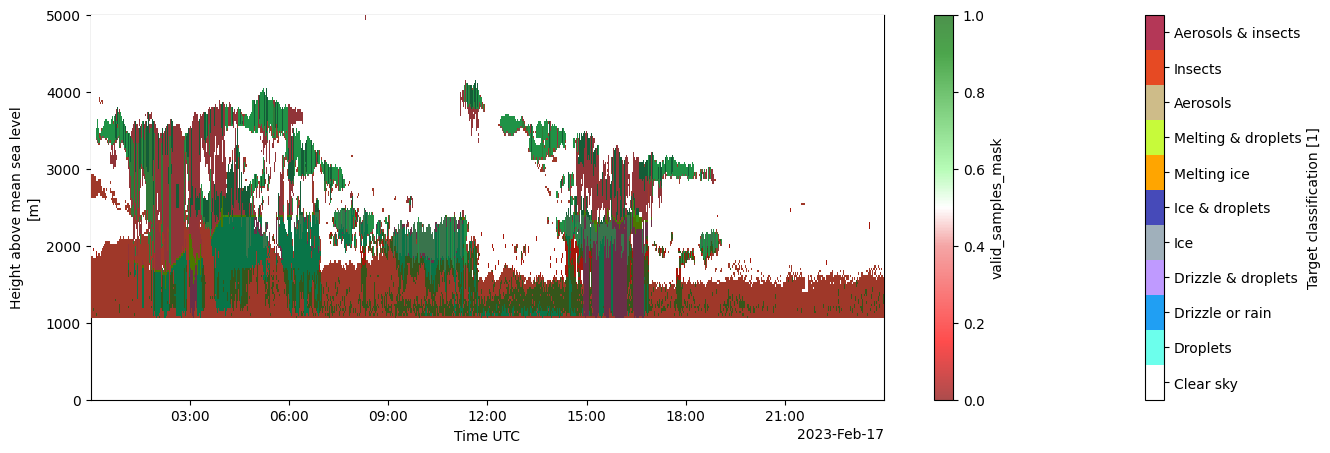

In [90]:
# show valid and invalid pixels in the classification plot, by adding a white and black patch to the plot
time = xr_class['time'].values
height = xr_class['height'].values

# quicklook at classification
fig, ax = plt.subplots(figsize=(16, 5))
# plot the target classification, important to set vmax to 11 to include all classes and make the ticks match the center of colors
pmesh = xr_class['target_classification'].T.plot(ax=ax, ylim=(0, 5000), 
                                                 cmap=cloudnet_cmap, vmax=11, zorder=10)

cbar = ax.collections[0].colorbar
cbar.set_ticks(np.arange(len(cloudnet_class_labels)) + 0.5)
cbar.set_ticklabels(cloudnet_class_labels)

pmesh2 = xr_class['valid_samples_mask'].T.plot(ax=ax, ylim=(0, 5000), 
                                               cmap=cmap_rg, alpha=0.7, zorder=11)
